<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression II

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
data = pd.read_csv("Sacramento_transactions.csv")

In [3]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [6]:
data['zip'] = data['zip'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null object
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


In [7]:
data['sale_date'] = pd.to_datetime(data['sale_date'].str.replace('EDT', 'UTC+4'))
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21 00:00:00-04:00,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21 00:00:00-04:00,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21 00:00:00-04:00,81900,38.519470,-121.435768


In [8]:
data['day'] = data['sale_date'].dt.day
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,day
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879,21
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028,21
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21 00:00:00-04:00,68880,38.618305,-121.443839,21
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21 00:00:00-04:00,69307,38.616835,-121.439146,21
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21 00:00:00-04:00,81900,38.519470,-121.435768,21


In [9]:
data[data['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,day
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,206000,38.631481,-121.501880,21
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,244500,38.626671,-121.525970,21
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,263500,38.553867,-121.219141,21
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,320000,38.528575,-121.228600,21
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,339500,38.602416,-121.542965,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,2008-05-15 00:00:00-04:00,138000,38.884150,-121.270277,15
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,2008-05-15 00:00:00-04:00,165000,38.584526,-121.534609,15
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,2008-05-15 00:00:00-04:00,188000,38.884170,-121.270222,15
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,2008-05-15 00:00:00-04:00,200100,38.569943,-121.527539,15


In [10]:
data.loc[data['beds'] == 0, 'type'] = 'Plot'

<AxesSubplot:>

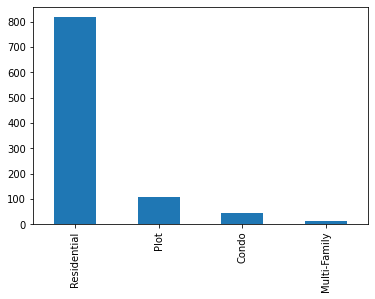

In [11]:
data['type'].value_counts().plot(kind='bar')

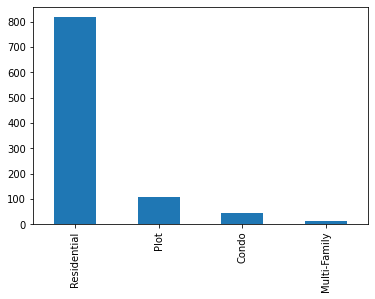

In [12]:
data['type'].value_counts().plot(kind='bar')
plt.show()

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [13]:
# ANSWER
# Price. We are predicting price based on other variables 

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [14]:
# ANSWER


## beds
## baths
## sqft
## Type

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

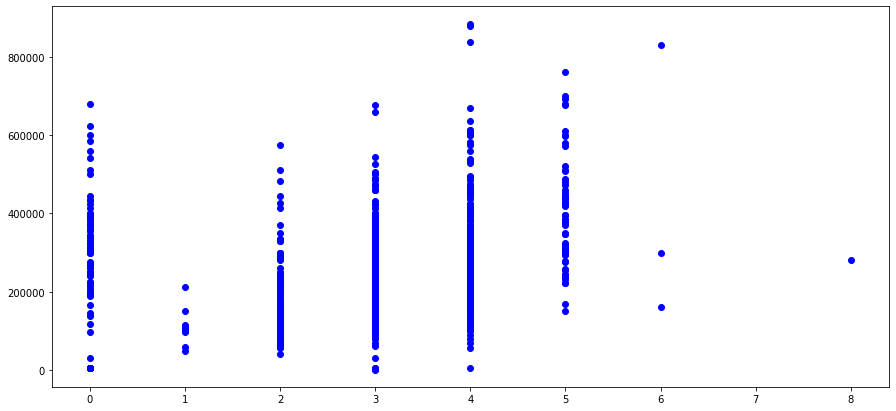

In [15]:
# ANSWER
def draw_scatter_plot(X, Y):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')

    plt.show();
    

    
draw_scatter_plot(data['beds'], data['price'])

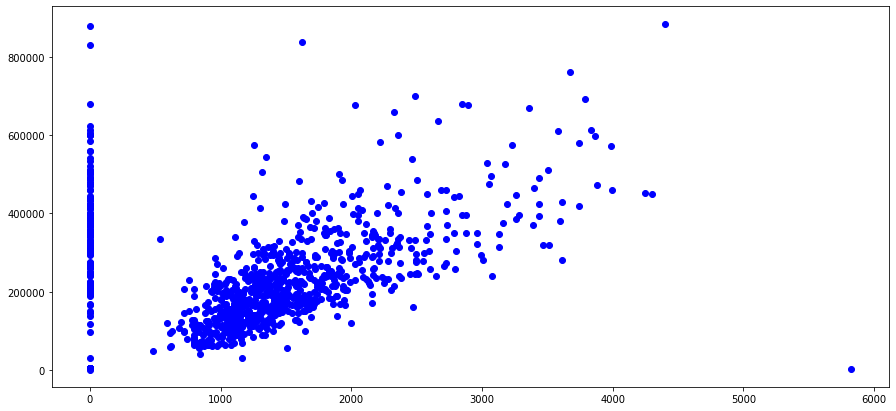

In [16]:
draw_scatter_plot(data['sq__ft'], data['price'])

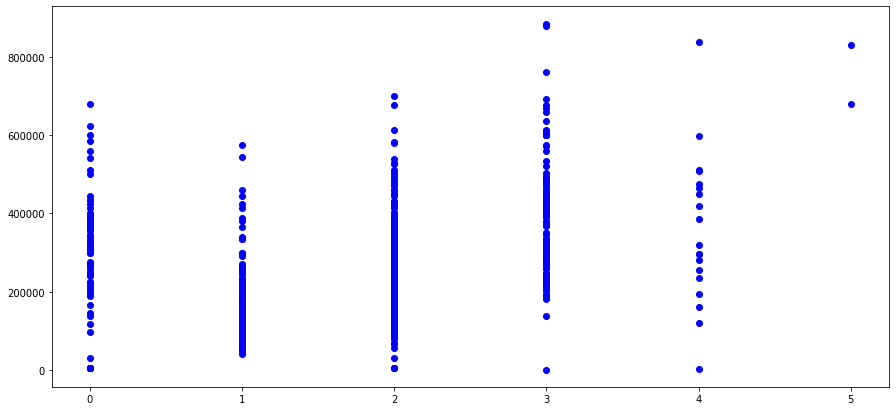

In [17]:
draw_scatter_plot(data['baths'], data['price'])

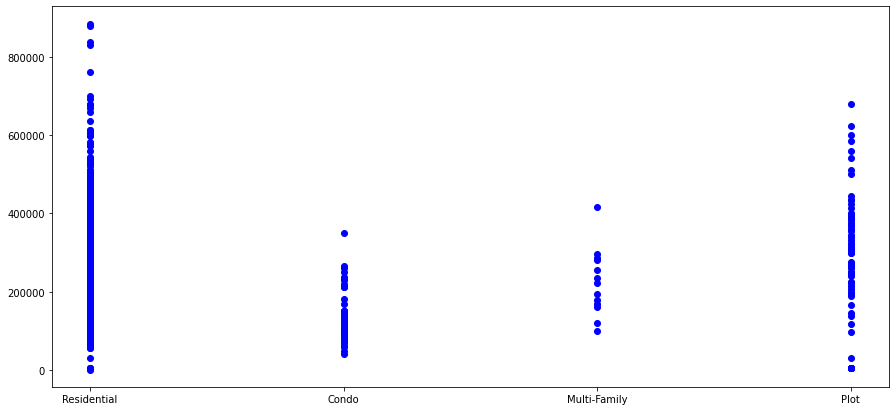

In [18]:
draw_scatter_plot(data['type'], data['price'])

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [19]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [20]:
# ANSWER

X = data['sq__ft'].values.reshape(-1,1)
Y = data['price']

linreg = LinearRegression()
linreg.fit(X, Y)

print(linreg.coef_, linreg.intercept_)


[54.15863969] 162930.16140699777


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [21]:
# ANSWER
linreg.score(X, Y)

0.11148717682951437

### 3. Splitting Data

In [22]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [24]:
# ANSWER
## Create training and testing subsets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [25]:
# ANSWER
## Check training/test data
print('X_train is a %s' % type(X_train))
print('X_train has %d rows', X_train.shape[0])
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_train[:10])

print('')
print('y_train is a %s' % type(y_train))
print('y_train has %d rows', y_train.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(Y_train[:10])

Print('Test data')
print('X_train is a %s' % type(X_test))
print('X_train has %d rows', X_test.shape)
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_test[:10])

print('')
print('y_train is a %s' % type(y_test))
print('y_train has %d rows', y_test.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(Y_test[:10])

X_train is a <class 'numpy.ndarray'>
X_train has %d rows 659

Sample of X_train__________________________________________________
[[1758]
 [1643]
 [2354]
 [   0]
 [1354]
 [   0]
 [ 958]
 [1232]
 [ 888]
 [1440]]



NameError: name 'y_train' is not defined

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [26]:
# ANSWER
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

print(linreg.coef_, linreg.intercept_)

[47.43508406] 166482.34144968857


In [27]:
# ANSWER
linreg.score(X_test, Y_test)

0.13602012247180006

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [28]:
# ANSWER
linreg.intercept_, linreg.coef_

beta0 = linreg.intercept_
beta1 = linreg.coef_
x = 1204

Ypred = beta1 * x + beta0
print('Predicted house price: ', Ypred[0])

x = [[1204]]
Ypred = linreg.predict(x)
print('Predicted house price: ', Ypred[0])

Predicted house price:  223594.18266380776
Predicted house price:  223594.18266380776


#### Find the error (Mean Squared Error)

In [30]:
# Predict price from X_test
from sklearn.metrics import mean_squared_error
Y_preds = linreg.predict(X_test)

Y_preds[:10]

mean_squared_error(Y_test, Y_preds, squared=True)

18951801967.76203



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



